In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy as sci
import matplotlib
import scikit_posthocs as sci_posthocs

import analysis as ana
import plot as pl

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.max_colwidth', None)

In [12]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=False)
font = {#'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
#mpl.rc('font', **font)

# Loading Data

In [6]:
cog_data_z, subj_data = ana.load_data('../data_zscore')
# removing control
cog_data_z = cog_data_z[subj_data.phenotype != 0]
subj_data = subj_data[subj_data.phenotype != 0]

'In good health': 0, 

'Affective psychosis': 1, 

'Non-affective psychosis': 2

# PCA

### cognitive features

In [14]:
pca = PCA()
pca.fit_transform(cog_data_z)
components = pca.components_
cog_data_z_pca = pca.transform(cog_data_z) # project the original data into the PCA space

In [15]:
var = pca.explained_variance_ratio_
cumsum = np.cumsum(var)
np.argmax(cumsum >= 0.95)

24

In [16]:
var_p = ana.permutation_test(cog_data_z, 5000)
var_p_mean = np.mean(var_p, axis=0)
t,p = sci.stats.ttest_1samp(var_p, var,alternative='less')
index_significant = np.where(p[:-1] != p[1:])[0][0]
print(sum(var[:index_significant+1]))
p

0.5367831301269651


array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [17]:
print(var[:10])
print(var_p_mean[:10])

[0.20500768 0.14555539 0.07442748 0.06145045 0.05034214 0.04039297
 0.03785953 0.03348686 0.03041538 0.02866226]
[0.05786351 0.05389192 0.0509257  0.0483945  0.04616114 0.04411574
 0.04227512 0.04051299 0.03884018 0.03724801]


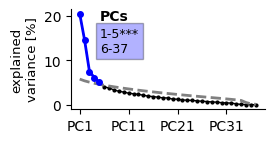

In [18]:
pl.plot_PC(cog_data_z, var, var_p_mean, index_significant)
plt.savefig('fig/PCs_cog_pat.svg', dpi=500, bbox_inches='tight')

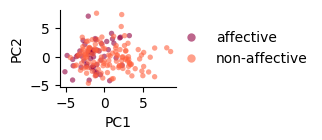

In [11]:
pl.plot_data_2D(cog_data_z_pca, patients = True, group=subj_data)
plt.savefig('fig/cog_data2D_pat.svg', dpi=500, bbox_inches='tight')

In [23]:
#sns.set(font_scale=1.0)
#sns.set_style(style='white') 

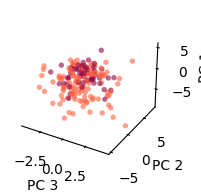

In [12]:
pl.plot_data_3D(cog_data_z_pca, True, subj_data)
plt.savefig('fig/cog_data3D_pat.svg', dpi=500, bbox_inches='tight')

In [13]:
cog_components = ana.get_feature_importance(cog_data_z, var, components)

In [14]:
ana.get_highest_contr_feat(cog_components, 'PC1')

Index(['cogcomp01_nih_crycogcomp_unadjusted', 'wasi201_iqscores_full2iq',
       'tpvt01_tpvt_acss', 'wasi201_vocab_totalrawscore', 'orrt01_read_acss',
       'cogcomp01_nih_fluidcogcomp_unadjusted', 'lswmt01_tbx_ls',
       'acpt01_%Hits', 'wasi201_matrix_totalrawscore',
       'dccs01_nih_dccs_ageadjusted'],
      dtype='object')

In [15]:
ana.get_highest_contr_feat(cog_components, 'PC2')

Index(['tlbx_rej01_pr_score',
       'prang01_anger_ts_nih_toolbox_anger-affect_cat_age_18+_v2.0',
       'prsi01_soil_rs', 'pss01_pss_distress_rs',
       'tlbx_perhost01_nih_tlbx_rawscore',
       'tlbx_emsup01_nih_tlbx_rawscore_nih_toolbox_emotional_support_ff_age_18+_v2.0',
       'tlbx_friend01_nih_tlbx_rawscore', 'tlbx_wellbeing01_tlbxpa_ts',
       'prang01_anger_ts_nih_toolbox_anger-hostility_ff_age_18+_v2.0',
       'predd01_edd_rs'],
      dtype='object')

In [16]:
ana.get_highest_contr_feat(cog_components, 'PC3')

Index(['deldisk01_auc_200', 'acpt01_RT', 'cgi01_gaf2b1', 'deldisk01_auc_40000',
       'cgi01_gaf2c', 'cgi01_gaf2a', 'dccs01_nih_dccs_ageadjusted',
       'flanker01_nih_flanker_ageadjusted', 'acpt01_%Hits',
       'cogcomp01_nih_fluidcogcomp_unadjusted'],
      dtype='object')

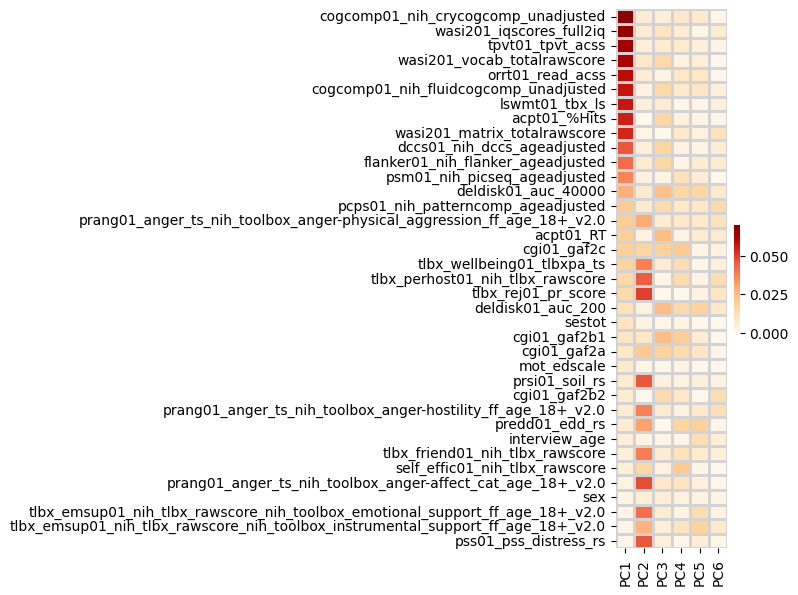

In [17]:
fig = plt.figure(figsize=(1.8,7))
im = sns.heatmap(cog_components[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']], 
                 cmap='OrRd', cbar_kws={"shrink": 0.2}, annot_kws={"fontsize":2}, linewidths=1,linecolor="lightgray", #annot=True,  fmt=".0",
                 vmin=0, vmax=0.07)
plt.savefig('fig/PCs_cog_loadings_pat.svg', dpi=500, bbox_inches='tight')

### brain features

In [21]:
pca = PCA()
pca.fit(brain_data_z)
components_brain = pca.components_
brain_data_z_pca = pca.transform(brain_data_z) # project the original data into the PCA space

In [22]:
var_brain = pca.explained_variance_ratio_
cumsum_brain = np.cumsum(var_brain)
np.argmax(cumsum_brain >= 0.95)

20

In [23]:
var_p_brain = ana.permutation_test(brain_data_z, 5000)
var_p_mean_brain = np.mean(var_p_brain, axis=0)
t,p = sci.stats.ttest_1samp(var_p_brain, var_brain, alternative='less')
index_significant_brain = np.where(p[:-1] != p[1:])[0][0]
print(sum(var_brain[:index_significant_brain+1]))
p

0.5423010859296385


array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
print(var_brain[:10])
print(var_p_mean_brain[:10])

[0.28231698 0.10593916 0.08410452 0.06994043 0.04965166 0.04772047
 0.04111673 0.03635897 0.03381856 0.02705583]
[0.07220203 0.06616633 0.06165417 0.05785202 0.05452151 0.05147477
 0.04862762 0.0460974  0.04366419 0.04133373]


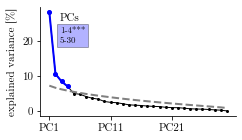

In [25]:
pl.plot_PC(brain_data_z, var_brain, var_p_mean_brain, index_significant_brain)
#plt.savefig('fig/PC_cog.svg', dpi=500, bbox_inches='tight')

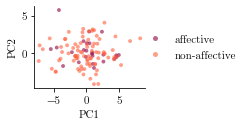

In [27]:
pl.plot_data_2D(brain_data_z_pca, True)

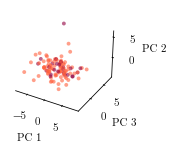

In [28]:
pl.plot_data_3D(brain_data_z_pca, True)

In [29]:
brain_components = ana.get_feature_importance(brain_data_z, var_brain, components_brain)

In [30]:
ana.get_highest_contr_feat(brain_components, 'PC1')

Index(['3', '4', '16', '5', '18', '29', '26', '8', '30', '1'], dtype='object')

In [31]:
ana.get_highest_contr_feat(brain_components, 'PC2')

Index(['7', '1', '12', '10', '6', '5', '14', '26', '15', '29'], dtype='object')

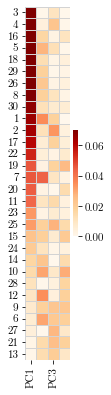

In [32]:
fig = plt.figure(figsize=(1.,6.5))

im = sns.heatmap(brain_components[['PC1', 'PC2', 'PC3', 'PC4']], 
                 cmap='OrRd', cbar_kws={"shrink": 0.3}, linewidths=1,linecolor="lightgray", #annot=True,  fmt=".0",
                 vmin=0, vmax=0.07)
im.set_yticklabels(im.get_yticklabels(), rotation=0)
im.set_xticklabels(im.get_xticklabels(), rotation=90)
plt.show()

### combined features 

In [33]:
data_z_all = cog_data_z.join(brain_data_z)

In [34]:
pca = PCA()
pca.fit_transform(data_z_all)
components_all = pca.components_
data_z_pca = pca.transform(data_z_all) # project the original data into the PCA space

In [35]:
var_all = pca.explained_variance_ratio_
cumsum = np.cumsum(var_all)
np.argmax(cumsum >= 0.95)

38

In [36]:
var_p_all = ana.permutation_test(data_z_all, 5000)
var_p_mean_all = np.mean(var_p_all, axis=0)
t,p = sci.stats.ttest_1samp(var_p_all, var_all, alternative='less')
index_significant_all = np.where(p[:-1] != p[1:])[0][0]
print(sum(var_all[:index_significant_all+1]))
p

0.5278076969033821


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       3.0814957e-62, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e

In [37]:
print(var_all[:10])
print(var_p_mean_all[:10])

[0.19309515 0.10200775 0.07167248 0.0465239  0.04165583 0.03877229
 0.03408029 0.03060003 0.02984187 0.0266679 ]
[0.04291374 0.04005781 0.0379743  0.03626417 0.03472822 0.03333025
 0.0320417  0.03083178 0.02969435 0.02862681]


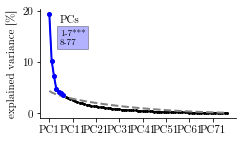

In [38]:
pl.plot_PC(data_z_all, var_all, var_p_mean_all, index_significant_all)
#plt.savefig('fig/PC_cog.svg', dpi=500, bbox_inches='tight')

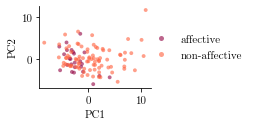

In [40]:
pl.plot_data_2D(data_z_pca, True)

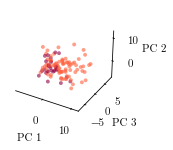

In [41]:
pl.plot_data_3D(data_z_pca, True)

In [42]:
all_components = ana.get_feature_importance(data_z_all, var_all, components_all)

In [43]:
ana.get_highest_contr_feat(all_components, 'PC1')

Index(['cogcomp01_nih_crycogcomp_unadjusted', 'acpt01_auditory_t9',
       'acpt01_auditory_t6', 'acpt01_auditory_t11',
       'cogcomp01_nih_fluidcogcomp_unadjusted', 'acpt01_auditory_t14',
       'tpvt01_tpvt_acss', 'orrt01_read_acss', 'wasi201_iqscores_full2iq',
       'acpt01_auditory_t4'],
      dtype='object')

In [44]:
ana.get_highest_contr_feat(all_components, 'PC2')

Index(['5', 'deldisk01_auc_200', 'deldisk01_auc_40000', 'acpt01_auditory_t5',
       'deldisk01_sv_5yr_40000', 'deldisk01_sv_3yr_40000', '1', '7', '4',
       'deldisk01_sv_10yr_40000'],
      dtype='object')

In [45]:
ana.get_highest_contr_feat(all_components, 'PC3')

Index(['deldisk01_auc_40000', 'deldisk01_sv_5yr_40000',
       'deldisk01_sv_10yr_40000', 'deldisk01_sv_6mo_40000',
       'deldisk01_sv_1mo_40000', 'deldisk01_auc_200', 'deldisk01_sv_3yr_40000',
       '3', 'deldisk01_sv_1yr_40000', '4'],
      dtype='object')

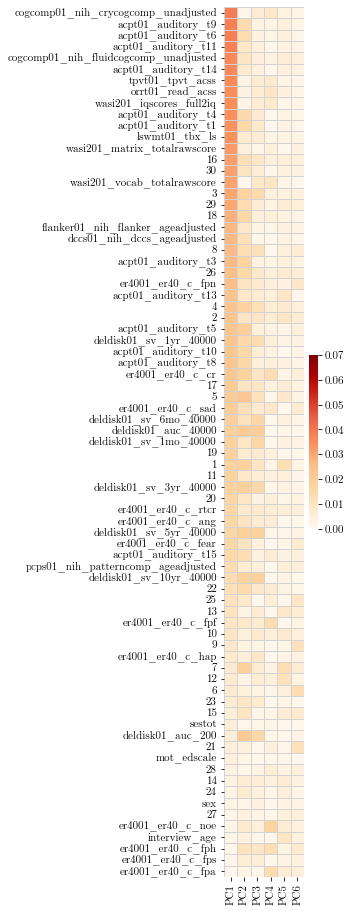

In [47]:
fig = plt.figure(figsize=(1.8,16))

im = sns.heatmap(all_components[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']], 
                 cmap='OrRd', cbar_kws={"shrink": 0.2}, linewidths=1,linecolor="lightgray", #annot=True,  fmt=".0",
                 vmin=0, vmax=0.07)